# EDA on Titanic Data

In [1]:
# Importting required libraries
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

In [2]:
# Importing the titanic dataset from seaborn library
df = sns.load_dataset('titanic')

In [3]:
titanic_df = df.copy()
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- As we can see there are null values in age,deck and embark_town column.
- So we have to fill age with median ,embarked,deck and embark_town with mode

In [5]:
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median())

In [6]:
titanic_df['deck'].fillna(titanic_df['deck'].mode()[0],inplace =True)
titanic_df['embark_town'].fillna(titanic_df['embark_town'].mode()[0],inplace =True)
titanic_df['embarked'].fillna(titanic_df['embarked'].mode()[0],inplace =True)

In [7]:
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

* we have to convert some columns to appropriate data types

In [8]:
titanic_df[['survived','pclass','sibsp','parch','adult_male','alone']] = titanic_df[['survived','pclass','sibsp','parch','adult_male','alone']].astype('object')

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    object  
 1   pclass       891 non-null    object  
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    object  
 5   parch        891 non-null    object  
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    object  
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    object  
dtypes: category(2), float64(2), object(11)
memory usage: 92.8+ KB


In [10]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


## Visualizations

<AxesSubplot:xlabel='alive', ylabel='count'>

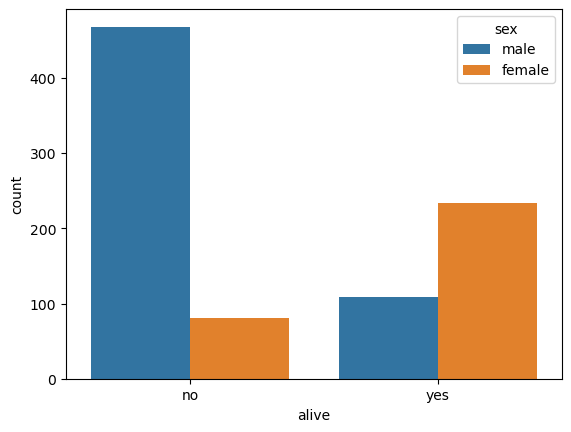

In [11]:
# survive rate gender wise
sns.countplot(data = titanic_df,x='alive',hue= 'sex')

* Here we can conclude that the survival ratio of females are higher than males.

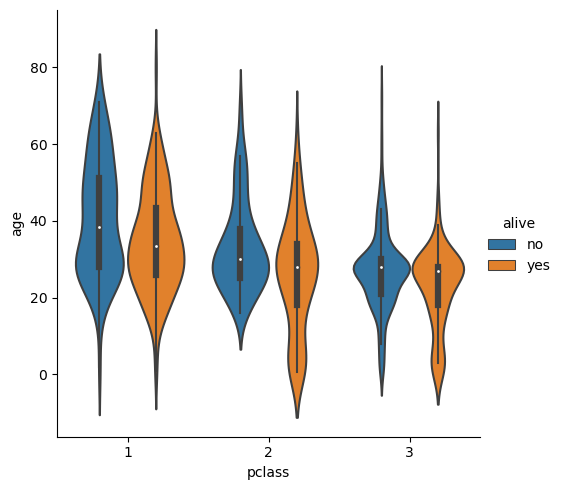

In [12]:
sns.catplot(x='pclass', y='age', data=titanic_df, kind='violin', hue='alive')

* Here we can conclude that the survival ratio of age group between 20 to 40 are bit more than other age groups.

<AxesSubplot:xlabel='alone', ylabel='count'>

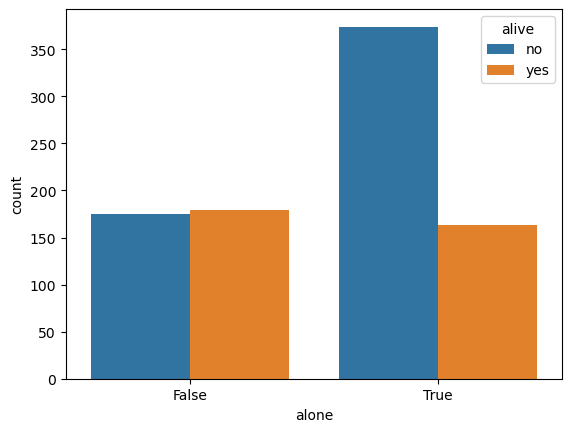

In [13]:
sns.countplot(data =titanic_df,x= 'alone',hue ='alive')

* Being alone is alive rate is low rather than being with family

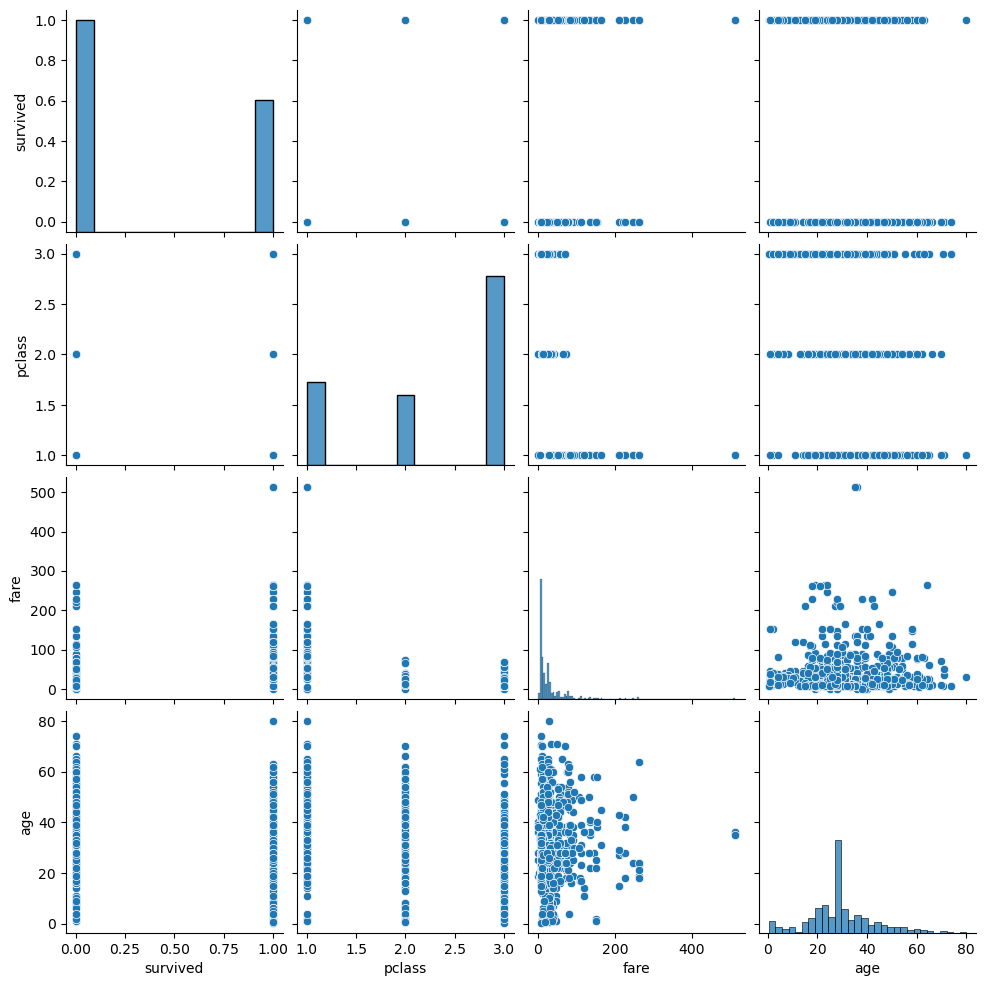

In [14]:
sns.pairplot(titanic_df[["survived","pclass","fare","age"]])

- From the above grid of plots, we can see that passengers who paid higher fares or traveling in the upper class have a higher chance to survive.
- Age is also giving some info like young persons have a higher chance to survive than old peoples.

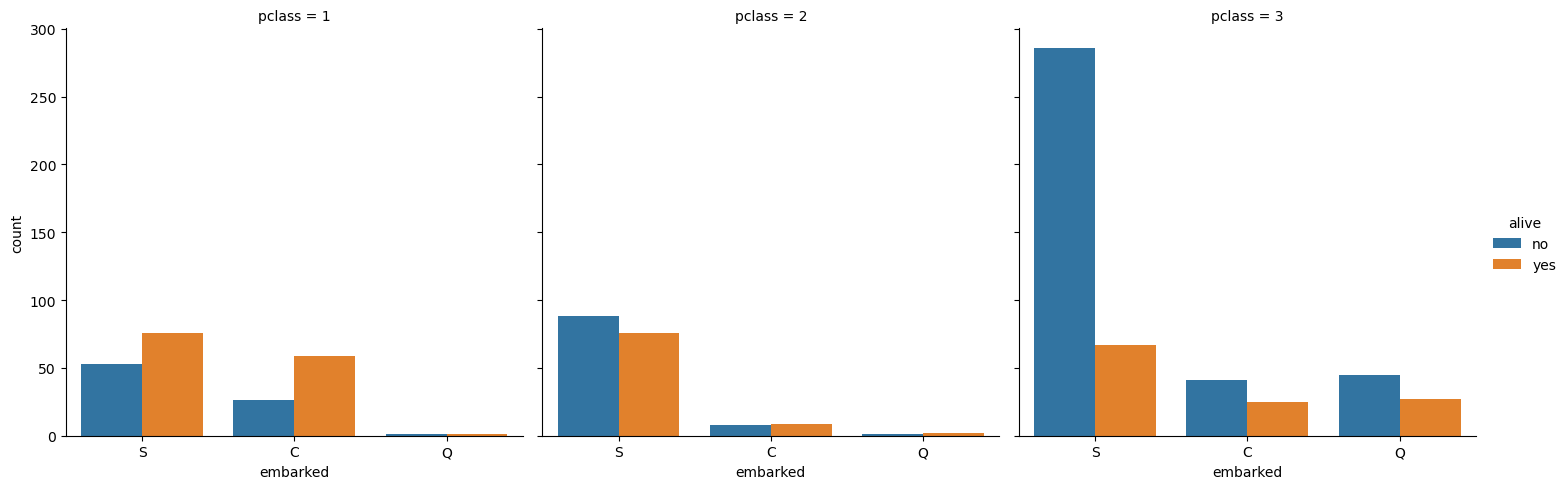

In [15]:
sns.catplot(x ='embarked', hue ='alive',kind ='count', col ='pclass', data = titanic_df)

- The people who are belongs to 's' embarked the survival chance is bit more than the others

- After the analysis we can see that we have so much simillar columns we don't need those columns for models so we can drop those columns

In [16]:
titanic_df.drop(["pclass",'who','survived','deck','embark_town'],axis=1,inplace=True)

In [17]:
# Final Data set for models
titanic_df

,sex,age,sibsp,parch,fare,embarked,class,adult_male,alive,alone
0,male,22.0,1,0,7.2500,S,Third,True,no,False
1,female,38.0,1,0,71.2833,C,First,False,yes,False
2,female,26.0,0,0,7.9250,S,Third,False,yes,True
3,female,35.0,1,0,53.1000,S,First,False,yes,False
4,male,35.0,0,0,8.0500,S,Third,True,no,True
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,True,no,True
887,female,19.0,0,0,30.0000,S,First,False,yes,True
888,female,28.0,1,2,23.4500,S,Third,False,no,False
889,male,26.0,0,0,30.0000,C,First,True,yes,True


In [18]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   sex         891 non-null    object  
 1   age         891 non-null    float64 
 2   sibsp       891 non-null    object  
 3   parch       891 non-null    object  
 4   fare        891 non-null    float64 
 5   embarked    891 non-null    object  
 6   class       891 non-null    category
 7   adult_male  891 non-null    object  
 8   alive       891 non-null    object  
 9   alone       891 non-null    object  
dtypes: category(1), float64(2), object(7)
memory usage: 63.8+ KB


# Model Building on titanic 

In [19]:
# our target column is alive son we divided the data into 2 parts.
x = titanic_df[['sex','sibsp','embarked','class','adult_male','alone','age','fare']]
y = titanic_df['alive']

In [20]:
# then we divided the data into train and test
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,
                                            test_size =0.3)

In [21]:
# Again we have to divide xTrain and xTest data to numerical and catagorical for scaling and encoding
x_train_cont = xTrain.select_dtypes('float64')
x_test_cont = xTest.select_dtypes('float64')

x_train_cat = xTrain.select_dtypes('object','category')
x_test_cat = xTest.select_dtypes('object','category')

## Transformation

In [22]:
# We will use Yeo-johson tranformer for both the numerical colomns
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

t_x_conttrain = pd.DataFrame(pt.fit_transform(x_train_cont),
                columns = x_train_cont.columns,
                index = x_train_cont.index)

t_x_conttest =  pd.DataFrame(pt.transform(x_test_cont),
                columns = x_test_cont.columns,
                index = x_test_cont.index)


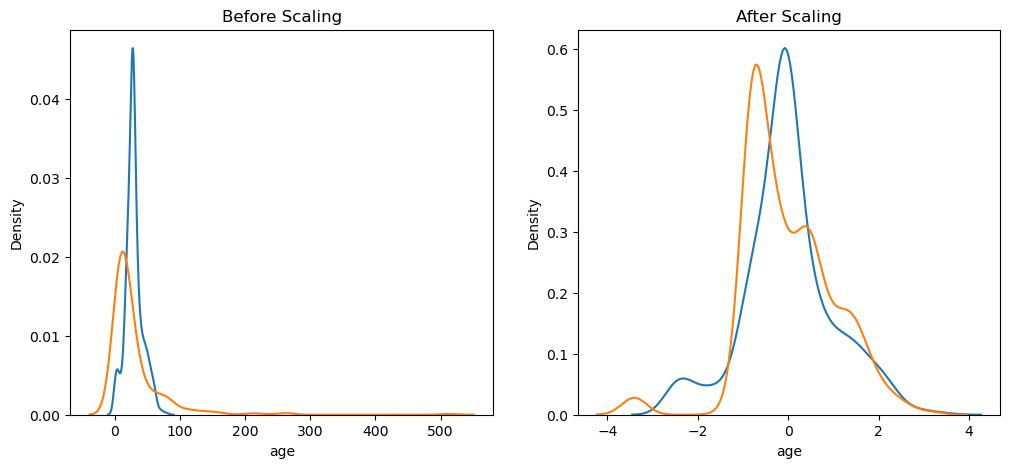

In [94]:
# Graph before transformation and after tranformation

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(x_train_cont['age'],ax=ax1)
sns.kdeplot(x_train_cont['fare'],ax =ax1)
ax1.set_title("Before Scaling")

sns.kdeplot(t_x_conttrain['age'],ax = ax2)
sns.kdeplot(t_x_conttrain['fare'],ax =ax2)
ax2.set_title("After Scaling")
plt.show()



# Normalization

<AxesSubplot:>

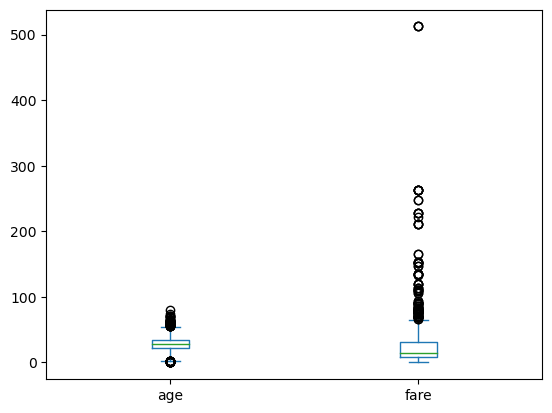

In [23]:
titanic_df.plot(kind='box')

In [24]:
# we have outliers in age and fare so we will use Robust Scaling
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
#for train
rs_x_Conttrain = pd.DataFrame(rs.fit_transform(t_x_conttrain),
                                columns = t_x_conttrain.columns,
                                index = t_x_conttrain.index)
#for test
rs_x_Conttest = pd.DataFrame(rs.transform(t_x_conttest),
                                columns = t_x_conttest.columns,
                                index = t_x_conttest.index)

In [25]:
rs_x_Conttrain

,age,fare
412,0.378278,1.363212
128,0.000000,0.360299
465,0.744283,-0.499132
852,-1.618519,0.074944
628,-0.155310,-0.415613
...,...,...
152,1.952290,-0.401309
219,0.152933,-0.203784
144,-0.805321,-0.135859
393,-0.393216,1.521503


## Encoding for categorical columns

In [26]:
x_train_cat

,sex,sibsp,embarked,adult_male,alone
412,female,1,Q,False,False
128,female,1,C,False,False
465,male,0,S,True,True
852,female,1,C,False,False
628,male,0,S,True,True
...,...,...,...,...,...
152,male,0,S,True,True
219,male,0,S,True,True
144,male,0,S,True,True
393,female,1,C,False,False


In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

In [30]:
ohe_x_cattrain = pd.DataFrame(ohe.fit_transform(x_train_cat),
                columns = ohe.get_feature_names_out(x_train_cat.columns),
                index = x_train_cat.index)

ohe_x_cattest =  pd.DataFrame(ohe.transform(x_test_cat),
                columns = ohe.get_feature_names_out(x_test_cat.columns),
                index = x_test_cat.index)


In [33]:
ohe_x_cattrain

,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,embarked_C,embarked_Q,embarked_S,adult_male_False,adult_male_True,alone_False,alone_True
412,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
128,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
465,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
852,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
628,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
219,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
144,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
393,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Dataset-1 With Scaled and encoded Data

In [34]:
final_train_1 = pd.concat([rs_x_Conttrain,ohe_x_cattrain],axis =1)

In [35]:
final_train_1

,age,fare,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,embarked_C,embarked_Q,embarked_S,adult_male_False,adult_male_True,alone_False,alone_True
412,0.378278,1.363212,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
128,0.000000,0.360299,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
465,0.744283,-0.499132,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
852,-1.618519,0.074944,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
628,-0.155310,-0.415613,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.952290,-0.401309,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
219,0.152933,-0.203784,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
144,-0.805321,-0.135859,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
393,-0.393216,1.521503,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [36]:
final_test_1 = pd.concat([rs_x_Conttest,ohe_x_cattest],axis =1)

In [37]:
final_test_1

,age,fare,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,embarked_C,embarked_Q,embarked_S,adult_male_False,adult_male_True,alone_False,alone_True
296,-0.353123,-0.480673,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
65,0.000000,0.074944,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
524,0.000000,-0.480673,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
726,0.152933,0.313747,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
610,0.816189,0.608005,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.233922,0.190620,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
850,-2.142354,0.608005,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
488,0.152933,-0.401309,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
448,-2.030618,0.249319,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Dataset-2 with raw continous data and encoded categorial data

In [39]:
final_train_2 = pd.concat([x_train_cont,ohe_x_cattrain],axis = 1)
final_test_2 = pd.concat([x_test_cont,ohe_x_cattest],axis = 1)

In [40]:
final_train_2

,age,fare,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,embarked_C,embarked_Q,embarked_S,adult_male_False,adult_male_True,alone_False,alone_True
412,33.0,90.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
128,28.0,22.3583,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
465,38.0,7.0500,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
852,9.0,15.2458,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
628,26.0,7.8958,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,55.5,8.0500,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
219,30.0,10.5000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
144,18.0,11.5000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
393,23.0,113.2750,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
final_test_2

,age,fare,sex_female,sex_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,embarked_C,embarked_Q,embarked_S,adult_male_False,adult_male_True,alone_False,alone_True
296,23.5,7.2292,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
65,28.0,15.2458,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
524,28.0,7.2292,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
726,30.0,21.0000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
610,39.0,31.2750,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,25.0,17.8000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
850,4.0,31.2750,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
488,30.0,8.0500,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
448,5.0,19.2583,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Decision Tree for dataset 1

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [71]:
dt.fit(final_train_1,yTrain)

DecisionTreeClassifier()

In [72]:
yTrainpred=dt.predict(final_train_1)
yTestpred=dt.predict(final_test_1)

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(yTrain,yTrainpred),accuracy_score(yTest,yTestpred)

(0.9775280898876404, 0.8097014925373134)

In [74]:
confusion_matrix(yTrain,yTrainpred),confusion_matrix(yTest,yTestpred)

(array([[397,   1],
        [ 13, 212]], dtype=int64),
 array([[127,  24],
        [ 27,  90]], dtype=int64))

## DecisionTree for Dataset-2

In [75]:
dt.fit(final_train_2,yTrain)

DecisionTreeClassifier()

In [76]:
yTrainpred_2=dt.predict(final_train_2)
yTestpred_2=dt.predict(final_test_2)

In [77]:
accuracy_score(yTrain,yTrainpred_2),accuracy_score(yTest,yTestpred_2)

(0.9775280898876404, 0.8134328358208955)

In [78]:
confusion_matrix(yTrain,yTrainpred_2),confusion_matrix(yTest,yTestpred_2)

(array([[397,   1],
        [ 13, 212]], dtype=int64),
 array([[128,  23],
        [ 27,  90]], dtype=int64))

## Logistic Regression for Dataset-1

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [69]:
lr.fit(final_train_1,yTrain)

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
yTrainnpred=lr.predict(final_train_1)
yTestpred=lr.predict(final_test_1)

In [80]:
accuracy_score(yTrain,yTrainpred),accuracy_score(yTest,yTestpred)

(0.9775280898876404, 0.832089552238806)

In [81]:
confusion_matrix(yTrain,yTrainpred),confusion_matrix(yTest,yTestpred)

(array([[397,   1],
        [ 13, 212]], dtype=int64),
 array([[132,  19],
        [ 26,  91]], dtype=int64))

## logistic regression for dataset-2

In [86]:
lr.fit(final_train_2,yTrain)

C:\Users\sreya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
yTrainpred_2=lr.predict(final_train_2)
yTestpred_2=lr.predict(final_test_2)

In [88]:
accuracy_score(yTrain,yTrainpred_2),accuracy_score(yTest,yTestpred_2)

(0.8089887640449438, 0.832089552238806)

In [89]:
confusion_matrix(yTrain,yTrainpred_2),confusion_matrix(yTest,yTestpred_2)

(array([[344,  54],
        [ 65, 160]], dtype=int64),
 array([[132,  19],
        [ 26,  91]], dtype=int64))

# Insights

- For Decission Tree scaling is not needed as we can see descision tree accuracy is same for both of the data sets but the prdiction is higher for train data and low for unseen data.
- For logistic regression model the prediction for unseen data is same for both data sets but the accuracy of raw cont with encoded categorical is low as compare to dataset -1.
- Here we can say the logistic regression model with scaled and encoded data works better as compare to other models.
